# Traffic Pridiction Random Forest Regrassor

In [1]:
# Import Libraries
import numpy as np # For Math
import pandas as pd # For Data Visualization
import matplotlib.pyplot as plt # For Graph
import seaborn as sns # For Advence Graph

from sklearn.model_selection import train_test_split # Import function to split dataset into training and testing sets
from sklearn.ensemble import RandomForestRegressor # Import the Random Forest Regressor model
from sklearn.metrics import mean_absolute_error, mean_squared_error # Regression evaluation metrics

import warnings # Handeling Error
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Traffic-Prediction-using-Machine-Learning.csv')
df.head()

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,Wednesday,01-06-18,3,2,35,17,2
1,Wednesday,01-06-18,3,3,36,16,3
2,Wednesday,01-06-18,3,4,27,25,5
3,Wednesday,01-06-18,3,5,23,23,3
4,Wednesday,01-06-18,3,6,18,42,2


In [3]:
df.describe()

,CodedDay,Zone,Weather,Temperature,Traffic
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,4.000695,72.549687,23.886032,25.011119,3.031967
std,1.733054,41.554330,13.576787,11.325376,1.429018
min,1.000000,1.000000,0.000000,6.000000,1.000000
25%,3.000000,37.000000,12.000000,15.000000,2.000000
50%,4.000000,73.000000,24.000000,25.000000,3.000000
75%,5.000000,108.500000,35.000000,35.000000,4.000000
max,7.000000,144.000000,47.000000,45.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          1439 non-null   object
 1   Date         1439 non-null   object
 2   CodedDay     1439 non-null   int64 
 3   Zone         1439 non-null   int64 
 4   Weather      1439 non-null   int64 
 5   Temperature  1439 non-null   int64 
 6   Traffic      1439 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 78.8+ KB


# Converting the data and time

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          1439 non-null   object        
 1   Date         1439 non-null   datetime64[ns]
 2   CodedDay     1439 non-null   int64         
 3   Zone         1439 non-null   int64         
 4   Weather      1439 non-null   int64         
 5   Temperature  1439 non-null   int64         
 6   Traffic      1439 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 78.8+ KB


# Feature Selection

In [7]:
features = ['CodedDay', 'Zone', 'Weather', 'Temperature']
X = df[features]
y = df['Traffic']

In [8]:
X.head()

,CodedDay,Zone,Weather,Temperature
0,3,2,35,17
1,3,3,36,16
2,3,4,27,25
3,3,5,23,23
4,3,6,18,42


In [9]:
y.head()

0    2
1    3
2    5
3    3
4    2
Name: Traffic, dtype: int64

# Choosing Algorithm
# I choose Random Forest Regression because it offers a great balance between performance, robustness, and simplicity. Here are the main reasons.

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [11]:
# Selection Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Predict Data
y_pred = model.predict(X_test)
y_pred

array([2.79, 3.48, 2.83, 2.47, 3.4 , 3.59, 3.19, 3.14, 3.53, 2.52, 2.87,
       3.18, 2.97, 3.04, 2.65, 4.02, 2.57, 3.06, 2.75, 2.59, 2.32, 2.42,
       3.31, 3.3 , 2.96, 2.89, 3.35, 2.75, 2.97, 2.71, 3.33, 2.91, 2.93,
       2.89, 3.11, 3.71, 3.14, 2.42, 3.29, 3.75, 3.26, 4.02, 2.32, 2.91,
       3.01, 2.57, 2.98, 3.11, 3.61, 2.24, 3.81, 3.26, 3.25, 3.48, 2.89,
       3.4 , 2.71, 2.87, 2.68, 2.87, 3.07, 2.64, 3.13, 2.55, 2.72, 3.56,
       3.11, 3.32, 2.3 , 2.82, 3.76, 1.24, 2.68, 3.69, 3.14, 3.29, 3.27,
       2.35, 2.75, 2.62, 2.74, 3.75, 2.65, 2.94, 3.29, 3.15, 2.77, 3.08,
       2.9 , 2.94, 2.6 , 2.38, 3.34, 3.  , 1.92, 2.3 , 2.66, 2.98, 3.43,
       2.74, 2.71, 2.71, 3.11, 2.82, 3.07, 2.82, 2.75, 2.67, 2.77, 2.84,
       2.88, 2.84, 3.14, 2.75, 2.51, 1.64, 2.95, 2.41, 3.79, 3.1 , 2.26,
       2.73, 3.55, 3.67, 2.89, 2.13, 3.66, 3.04, 3.49, 2.8 , 3.12, 2.91,
       3.08, 2.95, 3.48, 3.33, 2.57, 3.14, 2.42, 3.37, 2.06, 2.67, 3.17,
       2.31, 3.65, 2.2 , 2.17, 2.54, 3.67, 3.06, 3.

In [13]:
# Score Checking
model.score(X_test, y_test)

-0.04004800244910456

In [14]:
# Converting Array
y_test_array = np.array(y_test)

# Evaluate model performance
mae = mean_absolute_error(y_test_array, y_pred)
mse = mean_squared_error(y_test_array, y_pred)
error_rate = (np.abs(y_pred - y_test_array) / y_test_array).mean() * 100

In [15]:
# Print The Result
print(f'Mean Absolute Error: {mae:.2f}%')
print(f'Mean Squared Error: {mse:.2f}%')
print(f'Error Rate: {error_rate:.2f}%')

Mean Absolute Error: 1.29%
Mean Squared Error: 2.21%
Error Rate: 63.09%


# Data Visualization

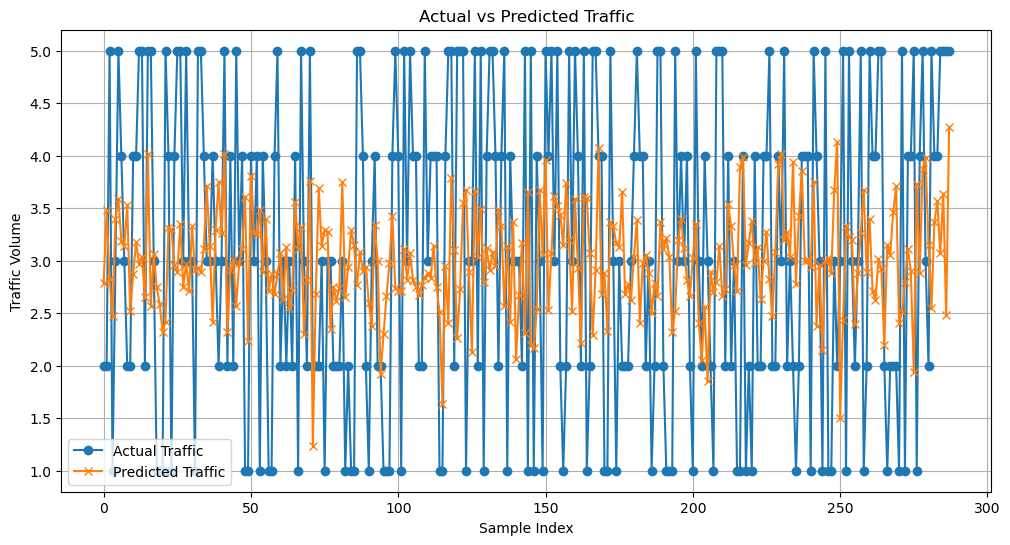

In [16]:
# Create a DataFrame with actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df = results_df.reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(results_df['Actual'], label='Actual Traffic', marker='o')
plt.plot(results_df['Predicted'], label='Predicted Traffic', marker='x')
plt.title('Actual vs Predicted Traffic')
plt.xlabel('Sample Index')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

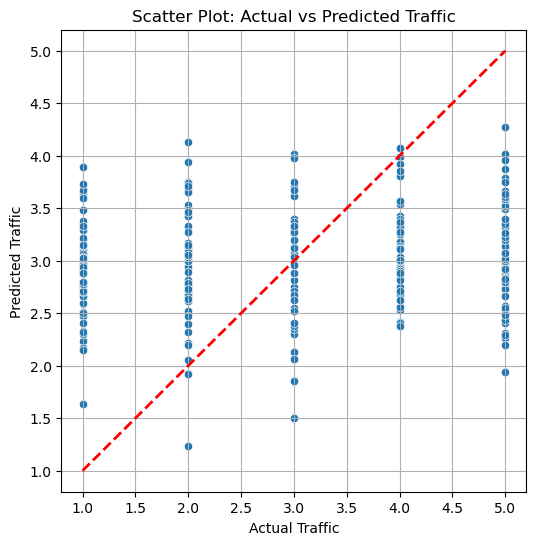

In [17]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         'r--', lw=2)
plt.title('Scatter Plot: Actual vs Predicted Traffic')
plt.xlabel('Actual Traffic')
plt.ylabel('Predicted Traffic')
plt.grid(True)
plt.show()

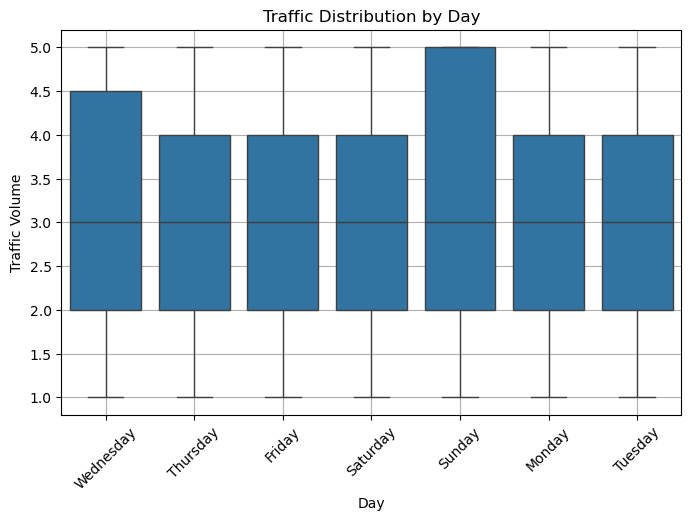

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Day', y='Traffic', data=df)
plt.title('Traffic Distribution by Day')
plt.xticks(rotation=45)
plt.ylabel('Traffic Volume')
plt.xlabel('Day')
plt.grid(True)
plt.show()